In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


---

### First lets import the initial datasets produced by just blindly matching up trolley runs

---

In [2]:
trolleyRuns_initial = []

with open("./data/datasets_fromProductionScript.txt") as file:
    for i, row in enumerate(file):
        if(i < 10):
            print(row)
        row = row.rstrip()
        #print(row)
        if("Trolley " in row):
            rowraw = row.split(" from ")[1].split(" ")
            startDate = rowraw[0]+" "+rowraw[1]
            endDate = rowraw[0]+" "+rowraw[3]
            #print(startDate, endDate)
        if("runs:" in row):
            rowraw = row.split(" ")
            fieldRunStart = rowraw[2].rstrip(",")
            fieldRunEnd = rowraw[4].rstrip(",")
        if("production:" in row):
            rowraw = row.split(" ")
            #print(rowraw)
            mainRunStart = rowraw[4].rstrip()
            mainRunEnd = rowraw[5].rstrip()
            trolleyRuns_initial.append([startDate, endDate, int(mainRunStart), int(mainRunEnd), int(fieldRunStart), int(fieldRunEnd)])

Trolley run from 02/06/2018 16:21:03 to 09:01:36

runs: field 2728 to 2765, main 11254 to 11365 

Last/First runs for production: 11253 11366

 

Trolley run from 02/07/2018 17:53:59 to 22:41:37

runs: field 2773 to 2800, main 11383 to 11457 

Last/First runs for production: 11382 11458

 

Trolley run from 02/07/2018 23:12:04 to 00:30:50

runs: field 2805 to 2812, main 11460 to 11460 



In [3]:
datasets_initial = []
for i, rowi in enumerate(trolleyRuns_initial):
    if(i == len(trolleyRuns_initial) - 1):
        j = i
    else:
        j = i+1
    rowj = trolleyRuns_initial[j]
    toappend=[ rowi[1],
              rowj[0],
              rowi[3],
              rowj[2],
              rowi[5],
              rowj[4]
             ]
    datasets_initial.append(toappend)

In [4]:
datasets_initial[0]

['02/06/2018 09:01:36', '02/07/2018 17:53:59', 11366, 11382, 2765, 2773]

In [5]:
#print(datasets_initial)

names=['startDate', 'endDate', 'mainRunStart', 'mainRunEnd', 'fieldRunStart', 'fieldRunEnd']
types=[str, str, int, int, int, int]
typeDict={x:y for (x,y) in zip(names,types)}

df = pandas.DataFrame(datasets_initial, columns=names)
df['startDate'] = pandas.to_datetime(df['startDate'])
df['endDate'] = pandas.to_datetime(df['endDate'])
print(df.dtypes)

df = df.loc[df['mainRunStart'] > 30000]

df.head()

startDate        datetime64[ns]
endDate          datetime64[ns]
mainRunStart              int64
mainRunEnd                int64
fieldRunStart             int64
fieldRunEnd               int64
dtype: object


,startDate,endDate,mainRunStart,mainRunEnd,fieldRunStart,fieldRunEnd
122,2019-11-24 12:10:04,2019-11-27 07:59:19,30086,30212,8690,8708
123,2019-11-27 10:53:33,2019-11-29 18:41:30,30247,30301,8714,8746
124,2019-11-29 21:29:53,2019-12-03 09:20:29,30311,30386,8749,8796
125,2019-12-03 11:33:29,2019-12-06 10:22:15,30394,30489,8798,8841
126,2019-12-06 13:23:22,2019-12-09 15:54:27,30493,30672,8848,8877


In [6]:
df.describe()

,mainRunStart,mainRunEnd,fieldRunStart,fieldRunEnd
count,45.000000,45.000000,45.000000,45.000000
mean,32667.377778,32732.288889,9439.911111,9467.177778
std,1448.896732,1433.039754,460.910355,459.372610
min,30086.000000,30212.000000,8690.000000,8708.000000
25%,31657.000000,31711.000000,9071.000000,9089.000000
50%,32707.000000,32781.000000,9409.000000,9453.000000
75%,33841.000000,33902.000000,9813.000000,9844.000000
max,34924.000000,34921.000000,10227.000000,10223.000000


/home/jlab/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


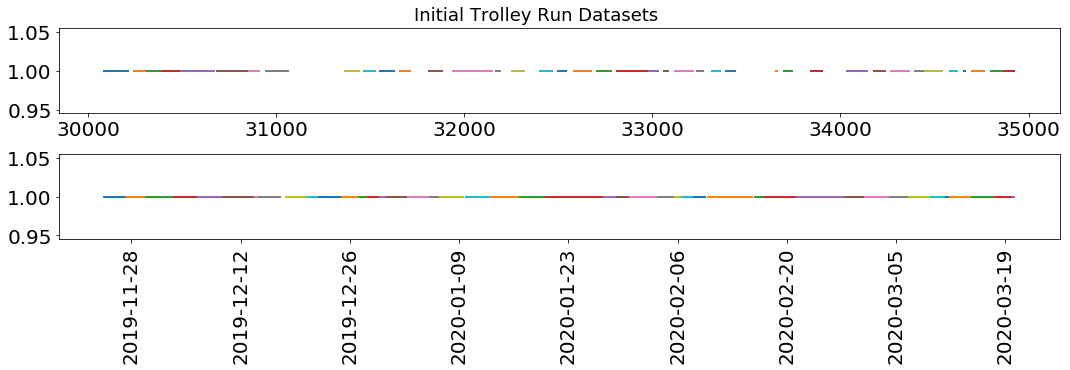

In [7]:
fig,ax = plt.subplots(2,1,figsize=(15,5))
for i, row in df.iterrows():
    ax[1].plot([row['startDate'], row['endDate']], [1,1],linewidth=2)
    ax[0].plot([row['mainRunStart'], row['mainRunEnd']], [1,1],linewidth=2)


plt.xticks(rotation=90)
plt.tight_layout()
plt.suptitle("Initial Trolley Run Datasets", y=1.02, fontsize=18)
plt.show()

In [107]:
numberOfSubruns = []

with open("./data/numberOfSubruns_run3_list.txt") as file:
    for row in file:
        ding = [int(x.strip(",")) for x in row.strip("[").strip(']\n').strip('\n').split(" ")[1:-1]]
        #print(ding)
        numberOfSubruns.append(ding)

dfn = pandas.DataFrame([x for x in zip(*numberOfSubruns)], columns=['run', 'nsubruns'])

In [110]:
for i, rowi in df.iterrows():
    dfn_i = dfn.loc[dfn['run'] >= rowi['mainRunStart']].loc[dfn['run'] <= rowi['mainRunEnd']].loc[dfn['nsubruns'] >= 100]
    print(dfn_i.describe())

                run    nsubruns
count     34.000000   34.000000
mean   30142.205882  364.176471
std       44.488868  152.454160
min    30087.000000  109.000000
25%    30097.250000  198.250000
50%    30146.500000  446.000000
75%    30172.000000  495.000000
max    30212.000000  496.000000
                run    nsubruns
count     35.000000   35.000000
mean   30274.914286  431.114286
std       14.848988  124.667268
min    30248.000000  103.000000
25%    30261.500000  439.500000
50%    30276.000000  497.000000
75%    30287.000000  498.000000
max    30298.000000  498.000000
                run    nsubruns
count     57.000000   57.000000
mean   30350.491228  419.052632
std       21.729771  135.205059
min    30313.000000  114.000000
25%    30335.000000  362.000000
50%    30353.000000  497.000000
75%    30367.000000  497.000000
max    30386.000000  498.000000
                run    nsubruns
count     49.000000   49.000000
mean   30443.183673  326.489796
std       31.735018  168.707973
min    3